## Correlations

## Strong or Weak Correlations
There is no one size fits all definition of what qualifies as strong or weak. This will require domain knowledge as fields and problems within fields vary.  

## Pearson’s Correlation Coefficient ($ρ$)

Pearson's ρ is the slope of the trend line between Y and X after means have been removed and the scales are normalized.

Plot X and Y then add a trend line. If the trend looks out of place, don't use Pearson's ρ.

Source: [FirefoxMetzger's post on stackexchange](https://stats.stackexchange.com/a/529735)

Slope: 0.79
Intercept: -0.00


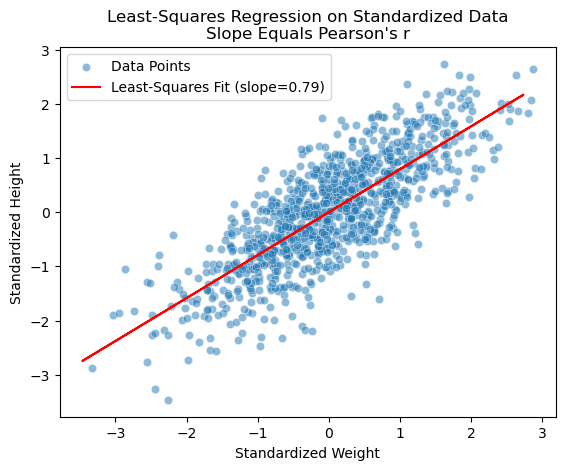

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

mean = [80, 175] # 80 kg (180 lb), 175 cm (5 ft 9 in)
cov = [[1, .8], [.8, 1]]
data = rng.multivariate_normal(mean=mean, cov=cov, size=1000)
df = pd.DataFrame(data, columns=('weight', 'height'))

# Standardize the data
df['weight_std'] = (df['weight'] - df['weight'].mean()) / df['weight'].std()
df['height_std'] = (df['height'] - df['height'].mean()) / df['height'].std()

X = sm.add_constant(df['height_std'])
Y = df['weight_std']
model = sm.OLS(X, Y)
results = model.fit()
intercept, slope = results.params.iloc[0]

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

sns.scatterplot(x='weight_std', y='height_std', data=df, alpha=0.5, label='Data Points')
plt.plot(df['height_std'], slope * df['height_std'] + intercept, color='red', label=f'Least-Squares Fit (slope={slope:.2f})')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.title("Least-Squares Regression on Standardized Data\nSlope Equals Pearson's r")
plt.legend()
plt.show()

In [7]:
df = pd.DataFrame(data, columns=('weight', 'height'))
print("df.corr():")
display(df.corr().round(2))

df.corr():


,weight,height
weight,1.00,0.79
height,0.79,1.00


In [16]:
df['weight'].corr(df['height'], method = 'pearson')


0.7925881182009413

In [ ]:
df['weight'].corr(df['height'], method = 'pearson')

In [8]:
df.cov()

,weight,height
weight,1.021281,0.781848
height,0.781848,0.952807


In [14]:
((df.weight - df.weight.mean()) * (df.height - df.height.mean())).sum() / (len(df) - 1)

0.7818483509958327

Spearman’s Rank Correlation Coefficient

In [ ]:
mean = [80, 175] # 80 kg (180 lb), 175 cm (5 ft 9 in)
cov = [[1, .8], [.8, 1]]
data = rng.multivariate_normal(mean=mean, cov=cov, size=1000)
men = pd.DataFrame(data, columns=('weight', 'height'))
men['sex'] = 'Male'

mean = [65, 160] # 65 kg (143 lb), 160 cm (5 ft 3 in)
cov = [[1, .8], [.8, 1]]
data = rng.multivariate_normal(mean=mean, cov=cov, size=1000)
women = pd.DataFrame(data, columns=('weight', 'height'))
women['sex'] = 'Female'

df = pd.concat([men, women])

ValueError: could not convert string to float: 'Male'

References:
- https://snakebear.science/08-Statistics/08_2_Basic_Statistics_Correlations.html